In [59]:
%matplotlib inline
# %matplotlib notebook

In [60]:
import ipympl
import pickle
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set()
from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [61]:
import os
import sys
modules_path = '/home/ratzenboe/Documents/diffractive-event-selection/recurrantNets/RNN/ml/'
if modules_path not in sys.path:
    sys.path.append(modules_path)

In [62]:
from modules.utils import engineer_features, split_dictionary, remove_field_name, flatten_dictionary, special_preprocessing, flatten_feature
from modules.control import config_file_to_dict
from modules.data_preparation import get_sub_dictionary, preprocess, shape_data

In [63]:
# load the event dictionary
with open('/media/hdd/train_files_extended/concat_evt_dic.pkl', 'rb') as f:
    ed = pickle.load(f)
# import the config file for data preprocessing
config_path = '/home/ratzenboe/Documents/diffractive-event-selection/recurrantNets/RNN/ml/config/'
data_params = config_file_to_dict(config_path+'data_params.conf')
data_params = data_params['NN']
# return only the subdictionary that is listed in the data-params config file:
ed = get_sub_dictionary(ed, data_params['branches'])
# contructing new features: opening angle & eta_phi_diff
ed = engineer_features(ed, replace=False)[0]
# we have saved targets for a different approach (koala-net) using the target 99 -> remove it now from target-list
not_99_indices = np.arange(ed['target'].shape[0])[ed['target']!=99]  
for key in ed.keys():
    ed[key] = ed[key][not_99_indices]

In [64]:
# MODE Nr.1 we do not preprocess the data (preprocess=std.scaling)

In [65]:
# MODE Nr.2 data is standard scaled
_ = preprocess(ed, out_path='/tmp/', load_fitted_attributes=False)

In [66]:
# convert the data from numpy-rec-arrays to standard numpy arrays
_ = shape_data(ed)

In [67]:
# flatten the track feature 
_= flatten_feature(ed, 'track')

In [68]:
# prepare the feature vector
x_train = np.c_[ed['track'], ed['event']]
y_train = ed['target']

In [69]:
# first we may use pca, before applying the t-sne algorithm
# init_dims = x_train.shape[1]
# pca = PCA(n_components=20, svd_solver='full')
# x_pca = pca.fit_transform(x_train)
# print('Inital dims: {} -> after pca: {}'.format(init_dims, x_pca.shape[1]))

In [91]:
perplxty = 60
tsne = TSNE(n_jobs=4, n_components=2, perplexity=perplxty, method='exact')
x_tsne = tsne.fit_transform(x_train)

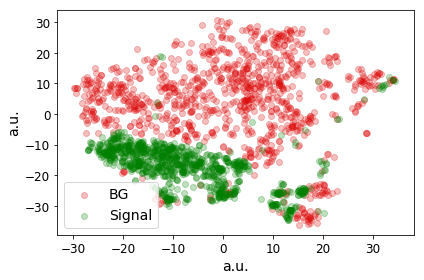

In [92]:
red = y_train == 0
green = y_train == 1

n_elemts = 1000

plt.scatter(x_tsne[red, 0][:n_elemts], x_tsne[red, 1][:n_elemts], c='#dd0000', marker='o', label='BG', alpha=0.25)
plt.scatter(x_tsne[green, 0][:n_elemts], x_tsne[green, 1][:n_elemts], c="g", marker='o', label='Signal', alpha=0.25)
plt.xlabel('a.u.', fontsize=14)
plt.ylabel('a.u.', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=14)
plt.tight_layout()


plt.savefig('/home/ratzenboe/Documents/diffractive-event-selection/recurrantNets/RNN/data/mlFeasability/t-sne_perplexitiy{}_npts{}.pdf'.format(perplxty, n_elemts))

plt.show()


In [23]:
# red = y_train == 0
# green = y_train == 1
# red = bg
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x_tsne[red, 0], x_tsne[red, 1], x_tsne[red,2], c='r', marker='o')
# green = signal
# ax.scatter(x_tsne[green, 0], x_tsne[green, 1], x_tsne[green,2], c="g", marker='o')

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

# plt.show()